In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #visualization
import matplotlib.pyplot as plt
import fasttext
from tqdm import tqdm
%matplotlib inline

In [3]:
wines130k = pd.read_csv("winemag-data-130k-v2.csv")
wines150k = pd.read_csv("winemag-data_first150k.csv")
#first going to decided which dataset to use

In [4]:
wines130k.describe()
wines130k.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
wines150k.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Clearly here that the 150k dataset is simpler and has more data. Personally, the title, taster name, and taster twitter handled doesnt matter much to me. So I will go with the 150l

In [6]:
wines = wines150k.drop(columns=['Unnamed: 0','designation'])

In [7]:
wines.head()

,country,description,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
wines.isnull().values.any()

True

<AxesSubplot:>

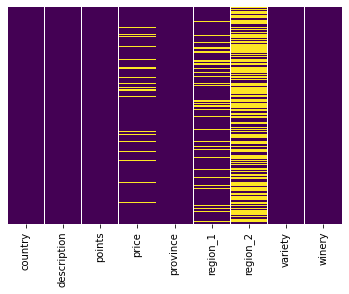

In [9]:
sns.heatmap(wines.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
wines = wines.drop(columns=['region_1','region_2'])

In [11]:
null_columns=wines.columns[wines.isnull().any()]
print(wines[wines["price"].isnull()][null_columns])

            country  price            province
32            Italy    NaN             Tuscany
56           France    NaN        Loire Valley
72            Italy    NaN            Piedmont
82            Italy    NaN            Piedmont
116           Spain    NaN             Levante
...             ...    ...                 ...
150377  New Zealand    NaN         Hawke's Bay
150378  New Zealand    NaN       Martinborough
150587       Canada    NaN             Ontario
150673           US    NaN          California
150922        Italy    NaN  Northeastern Italy

[13695 rows x 3 columns]


In [12]:
wines.price.fillna(wines.price.dropna().median(),inplace =True)

<AxesSubplot:>

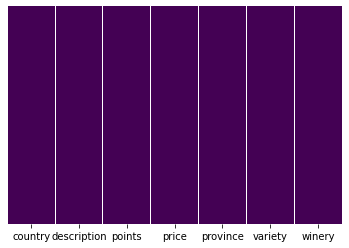

In [13]:
sns.heatmap(wines.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='price'>

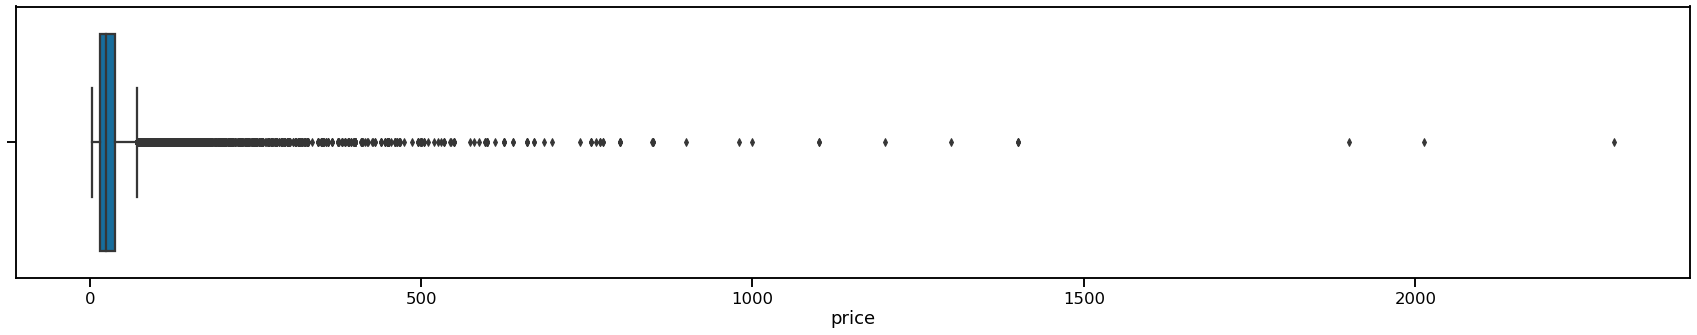

In [14]:
#We can see that there are no 'abnormal' values and most of the values are real, and will be useful for future analysis.
sns.set_context("talk")
plt.figure(figsize=(30,5))
sns.boxplot(x=wines['price'],palette = 'colorblind')

<AxesSubplot:xlabel='points'>

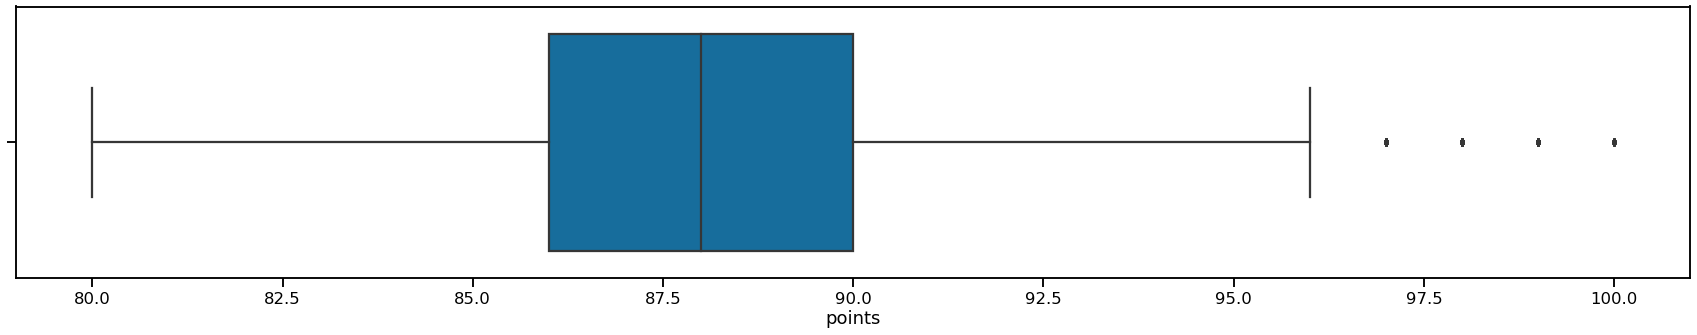

In [15]:
#Here also we can see that there is no outliers and the points are between 80 and 100.
sns.set_context("talk")
plt.figure(figsize=(30,5))
sns.boxplot(x=wines['points'],palette = 'colorblind')

In [16]:
wines.describe()

,points,price
count,150930.000000,150930.000000
mean,87.888418,32.302915
std,3.222392,34.734610
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,38.000000
max,100.000000,2300.000000


In [17]:
wines.head()

,country,description,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Provence red blend,Domaine de la Bégude


In [18]:
wines.to_csv('winesft.csv', index=False, encoding='utf-8')

### Creating some quick programs to quickly clean up the data.
In each I have added examples of how it is changing the text. 

In [19]:
from contractions import contractions_dict
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import re
from bs4 import BeautifulSoup
import unicodedata

nlp = spacy.load('en_core_web_md', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [20]:
#removing html
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [21]:
#removing accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [22]:
#removing contractions
def expand_contractions(text, contraction_mapping=contractions_dict):
  contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

  def expand_match(contraction):
      match = contraction.group(0)
      first_char = match[0]
      expanded_contraction = contraction_mapping.get(match) \
          if contraction_mapping.get(match) \
          else contraction_mapping.get(match.lower())
      expanded_contraction = first_char + expanded_contraction[1:]
      return expanded_contraction


  try:
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
  except:
    return text
  return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all can not expand contractions I would think'

In [23]:
#removing special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [24]:
#prepping for stemming
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

In [25]:
#lemmatizing text
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crashed yesterday , ours crash daily'

In [26]:
#removing stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [27]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        if contraction_expansion:
            doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [28]:
wines['country'] = wines['country'].astype(str)
wines['description'] = wines['description'].astype(str)
wines['province'] = wines['province'].astype(str)
wines['winery'] = wines['winery'].astype(str)
wines['variety'] = wines['variety'].astype(str)
wines['price'] = wines['price'].astype('int64')

In [29]:
wines.dtypes

country        object
description    object
points          int64
price           int64
province       object
variety        object
winery         object
dtype: object

In [31]:
wines['description'] = normalize_corpus(wines['description'])

In [32]:
wines.head()

,country,description,points,price,province,variety,winery
0,US,tremendous varietal wine hail oakville age thr...,96,235,California,Cabernet Sauvignon,Heitz
1,Spain,ripe aroma fig blackberry cassis soften sweete...,96,110,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,mac watson honor memory wine make mother treme...,96,90,California,Sauvignon Blanc,Macauley
3,US,spend month new french oak incorporate fruit p...,96,65,Oregon,Pinot Noir,Ponzi
4,France,top wine la begude name high point vineyard fo...,95,66,Provence,Provence red blend,Domaine de la Bégude


In [34]:
wines['winery'] = normalize_corpus(wines['winery'])

In [35]:
#Saving new cleaned dataframe to csv file
wines.to_csv('winesft.csv', index=False, encoding='utf-8')